<a href="https://colab.research.google.com/github/kfahn22/FastGAN-pytorch/blob/test/fastGAN_snowflakes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[FastGAN](https://github.com/odegeasslbc/FastGAN-pytorch/blob/main/train.py)

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!cp /content/gdrive/MyDrive/snowflake_images2 -r /content/snowflake_images

In [4]:
!git clone https://github.com/odegeasslbc/FastGAN-pytorch.git

Cloning into 'FastGAN-pytorch'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 122 (delta 6), reused 7 (delta 1), pack-reused 108
Receiving objects: 100% (122/122), 131.87 KiB | 13.19 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [5]:
%cd FastGAN-pytorch

/content/FastGAN-pytorch


In [10]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
!pip install opencv-python -q datasets huggingface_hub lmdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.8 MB/s eta 0:00:00


In [11]:
!python train.py --path /content/snowflake_images --iter=10000 --im_size=256

Setting up Perceptual loss...
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100% 528M/528M [00:06<00:00, 79.8MB/s]
Loading model from: /content/FastGAN-pytorch/lpips/weights/v0.1/vgg.pth
...[net-lin [vgg]] initialized
...Done
Namespace(path='/content/snowflake_images', cuda=0, name='test1', iter=10000

In [6]:
%cd /content/gdrive/MyDrive/train_results_snowflake/test1

/content/gdrive/MyDrive/train_results_snowflake/test1


In [45]:
!cp /content/FastGAN-pytorch/train_results_snowflake -r /content/gdrive/MyDrive/

^C


In [30]:
ls

args.txt  diffaug.py  eval.py  images/  models/  models.py  operation.py  __pycache__/  train.py


In [ ]:
path_checkpoint = "/models/10000.pth"

In [49]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: /content/FastGAN-pytorch/train_results_snowflake/test1


/content/FastGAN-pytorch/train_results/test1/models/10000.pth

In [9]:
#!python /content/FastGAN-pytorch/train_results/test1/eval.py --n_sample 50 --start_iter 1
!python eval.py --n_sample 50 --start_iter 1 --ckpt models/10000.pth

Traceback (most recent call last):
  File "/content/gdrive/MyDrive/train_results_snowflake/test1/eval.py", line 68, in <module>
    checkpoint = torch.load(ckpt, map_location=lambda a,b: a)
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 986, in load
    with _open_file_like(f, 'rb') as opened_file:
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 435, in _open_file_like
    return _open_file(name_or_buffer, mode)
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 416, in __init__
    super().__init__(open(name, mode))
FileNotFoundError: [Errno 2] No such file or directory: '/models/10000.pth'


# Training a lightweightgan on my orbs dataset

GAN ref: https://github.com/lucidrains/lightweight-gan

In this notebook we
- Download the dataset from the hub
- Save the images we want to train on in a folder
- Set the GAN training code running in the terminal
- Load a saved model once it's trained for a bit
- Push the trained model to the hub
- Load it and test

I'm new to using huggingface hub and the way I add the PyTorchModelHubMixin base class here might be sketchy. Keen to learn the 'proper' way to do this :)

Notebook by @johnowhitaker

# Setup

In [ ]:
!pip install -q lightweight-gan

In [ ]:
!apt-get install git-lfs

In [ ]:
!pip install -q datasets

# Load The Dataset

Downloading:   0%|          | 0.00/831 [00:00<?, ?B/s]

Using custom data configuration johnowhitaker--glid3_orbs-5d1278142e806699


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/parquet/johnowhitaker--glid3_orbs-5d1278142e806699/0.0.0/0b6d5799bb726b24ad7fc7be720c170d8e497f575d02d47537de9a5bac074901. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

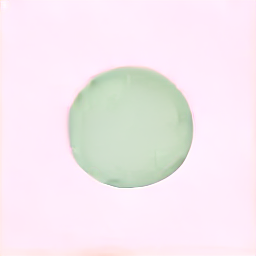

In [ ]:
from datasets import load_dataset
dataset = load_dataset("johnowhitaker/glid3_orbs")
dataset['train'][3000]['image']

In [ ]:
type(dataset['train'][0]['image'])

PIL.PngImagePlugin.PngImageFile

In [ ]:
!mkdir -p orbs
for i, im in enumerate(dataset['train']):
  # Could filter by label here or something
  im['image'].save(f'orbs/{i:05}.png')

# Start The Training

I set this running in terminal instead so we can do other stuff while it trains :) It took maybe 2.5 hours to finish 4 epochs, but even after one or two epochs for this dataset it was making some fairly nice images.

In [ ]:
# !lightweight_gan --data orbs --image-size 256

# Load the latest saved model and test, then push to hub

In [ ]:
from lightweight_gan import LightweightGAN, Trainer
import torch
from matplotlib import pyplot as plt

In [ ]:
!lightweight_gan \
    --data ./path/to/images \
    --name first \
    --batch-size 16 \
    --gradient-accumulate-every 4 \
    --num-train-steps 1000
    --image-size 256

In [ ]:
# See https://github.com/lucidrains/lightweight-gan for code
trainer = Trainer(latent_dim=256, image_size=256)
trainer.load()

continuing from previous epoch - 4
loading from version 0.20.8


In [ ]:
# We just care about the generator
gan = trainer.GAN.G # .GE for the EMA version

In [ ]:
# Generate some images from random latents
ims = gan(torch.randn(6, 256).cuda()).clamp_(0., 1.)
ims.shape

torch.Size([6, 3, 256, 256])

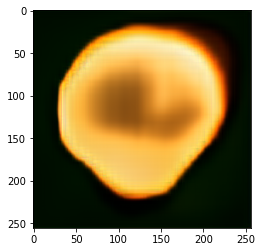

In [ ]:
# View one
plt.imshow(ims[0].permute(1, 2, 0).detach().cpu().numpy())

The original code doesn't use the PyTorchModelHubMixin, so gan.push_to_hub isn't a function that exists. However, we can add this additional base class like so:

In [ ]:
type(gan), type(trainer.GAN)

(lightweight_gan.lightweight_gan.Generator,
 lightweight_gan.lightweight_gan.LightweightGAN)

In [ ]:
from huggingface_hub import PyTorchModelHubMixin

In [ ]:
class GeneratorWithPyTorchModelHubMixin(gan.__class__, PyTorchModelHubMixin):
    pass

gan.__class__ = GeneratorWithPyTorchModelHubMixin

In [ ]:
# help(gan.push_to_hub) # Now we can push to hub!

A few other bits of housekeeping before we can push to the hub: logging in and setting git credentials (also make sure you installed git lfs up top)

In [ ]:
!huggingface-cli login

In [ ]:
! git config --global user.name "johnowhitaker"
! git config --global user.email "johnowhitaker@gmail.com"

Now for the magic part!

In [ ]:
gan.push_to_hub('johnowhitaker/orbgan_e1')

Cloning https://huggingface.co/johnowhitaker/orbgan_e1 into local empty directory.


Download file orbgan_e2_GANG_state_dict.pt:   0%|          | 3.47k/49.1M [00:00<?, ?B/s]

Download file pytorch_model.bin:   0%|          | 1.79k/49.1M [00:00<?, ?B/s]

Clean file pytorch_model.bin:   0%|          | 1.00k/49.1M [00:00<?, ?B/s]

Clean file orbgan_e2_GANG_state_dict.pt:   0%|          | 1.00k/49.1M [00:00<?, ?B/s]

Upload file pytorch_model.bin:   0%|          | 3.34k/49.1M [00:00<?, ?B/s]

To https://huggingface.co/johnowhitaker/orbgan_e1
   c66da56..97d4a8e  main -> main



'https://huggingface.co/johnowhitaker/orbgan_e1/commit/97d4a8ecd2b48de9426bb0a16d993e2beccb7db5'

In [ ]:
## ^ Might give issues if running multiple times,
#!rm -r johnowhitaker # and restart if so.

In [ ]:
# Alt to save locally:
torch.save(gan.state_dict(), 'orbgan_e4_state_dict.pt')

# Loading as if we're a new user

In [ ]:
!rm -r johnowhitaker # So we check that it downloads

config.json not found in HuggingFace Hub


Downloading:   0%|          | 0.00/51.5M [00:00<?, ?B/s]

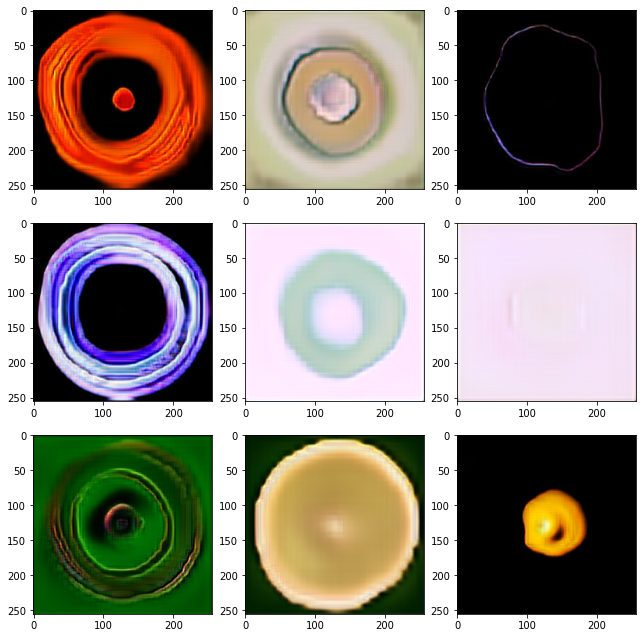

In [ ]:
from lightweight_gan import Generator
import torch
from matplotlib import pyplot as plt
from huggingface_hub import PyTorchModelHubMixin

# Initialize a generator model
gan_new = Generator(latent_dim=256, image_size=256, attn_res_layers = [32])

# Load from local saved state dict
# gan_new.load_state_dict(torch.load('/content/orbgan_e3_state_dict.pt'))

# Load from model hub:
class GeneratorWithPyTorchModelHubMixin(gan_new.__class__, PyTorchModelHubMixin):
    pass
gan_new.__class__ = GeneratorWithPyTorchModelHubMixin
gan_new = gan_new.from_pretrained('johnowhitaker/orbgan_e1', latent_dim=256, image_size=256, attn_res_layers = [32])

# View some examples
n_rows = 3
ims = gan_new(torch.randn(n_rows**2, 256)).clamp_(0., 1.)
fig, axs = plt.subplots(n_rows, n_rows, figsize=(9, 9))
for i, ax in enumerate(axs.flatten()):
  ax.imshow(ims[i].permute(1, 2, 0).detach().cpu().numpy())
plt.tight_layout()

I missed that the cli trains it with `attn_res_layers = [32]` and it took me AGES to figure out why the results looked different. Great lessons learnt. Now time for bed!

PS: the lightweight GAN code has `assert torch.cuda.is_available(), 'You need to have an Nvidia GPU with CUDA installed.'` so sadly a GPU is needed to run the GAN, making a spaces demo hard :(